In [1]:
import pandas as pd
import os
def Get_Data(path):
    # Define the directory path
    dir_path = path

    # Create empty dataframe
    df = pd.DataFrame(columns=['filename', 'label'])

    # Iterate over the subdirectories
    for genre in os.listdir(dir_path):
        sub_dir = os.path.join(dir_path, genre)
        if os.path.isdir(sub_dir):
            # Get a list of WAV files within the subdirectory
            wav_files = os.listdir(sub_dir)
            for file in wav_files:
                # Extract file name without extension as label
                name = os.path.splitext(os.path.basename(file))[0]
                # Remove the prefix 'F' or 'H' from the file name
                label = name[1:]
                df = df.append({'filename': os.path.join(sub_dir, file), 'label': os.path.join(genre,label).replace("\\", "")}, ignore_index=True)

    return df


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Train_data=Get_Data('/content/drive/MyDrive/Train')
Test_data=Get_Data('/content/drive/MyDrive/Test')

<ipython-input-1-f19a3d764eb5>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': os.path.join(sub_dir, file), 'label': os.path.join(genre,label).replace("\\", "")}, ignore_index=True)
<ipython-input-1-f19a3d764eb5>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': os.path.join(sub_dir, file), 'label': os.path.join(genre,label).replace("\\", "")}, ignore_index=True)
<ipython-input-1-f19a3d764eb5>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': os.path.join(sub_dir, file), 'label': os.path.join(genre,label).replace("\\", "")}, ignore_index=True)
<ipython-input-1-f19a3d764eb5>:21: FutureWarning: The frame.append method is deprecated and will 

In [4]:
Train_data

,filename,label
0,/content/drive/MyDrive/Train/H/H6.wav,H/6
1,/content/drive/MyDrive/Train/H/H8.wav,H/8
2,/content/drive/MyDrive/Train/H/H5.wav,H/5
3,/content/drive/MyDrive/Train/H/H9.wav,H/9
4,/content/drive/MyDrive/Train/H/H7.wav,H/7
5,/content/drive/MyDrive/Train/H/H4.wav,H/4
6,/content/drive/MyDrive/Train/H/H1.wav,H/1
7,/content/drive/MyDrive/Train/F/F9.wav,F/9
8,/content/drive/MyDrive/Train/F/F4.wav,F/4
9,/content/drive/MyDrive/Train/F/F7.wav,F/7


In [5]:
Test_data

,filename,label
0,/content/drive/MyDrive/Test/H/H9.wav,H/9
1,/content/drive/MyDrive/Test/H/H1.wav,H/1
2,/content/drive/MyDrive/Test/H/H5.wav,H/5
3,/content/drive/MyDrive/Test/H/H8.wav,H/8
4,/content/drive/MyDrive/Test/H/H7.wav,H/7
5,/content/drive/MyDrive/Test/H/H4.wav,H/4
6,/content/drive/MyDrive/Test/H/H6.wav,H/6
7,/content/drive/MyDrive/Test/F/F1.wav,F/1
8,/content/drive/MyDrive/Test/F/F8.wav,F/8
9,/content/drive/MyDrive/Test/F/F9.wav,F/9


In [ ]:
!pip install python_speech_features
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
from scipy.fftpack import dct
import IPython.display as ipd

In [6]:
!pip install python_speech_features
import numpy as np
from scipy.io import wavfile
from python_speech_features import mfcc


def extract_features(data,dir_path):
  

  # Create empty list to store MFCC features
  mfcc_features = []
  # Iterate over the rows in train_df
  for index, row in data.iterrows():
    # Get the filename and label from the row
    filename = row['filename']
    label = row['label']
    # Create the full path to the audio file
    audio_file_path = os.path.join(dir_path, label, filename)
    
    sampling_rate, signal = wavfile.read(audio_file_path)
    
    # Calculate MFCC features
    mfcc_features_curr = mfcc(signal, sampling_rate)
    
    # Append the MFCC features to the list
    mfcc_features.append(mfcc_features_curr)
  return mfcc_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=04bec3d4dc415157483e70e1bb69d1710599a106cd11177e9364d7a5598ca5c7
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [7]:
Train_mfcc_features=extract_features(Train_data,'/content/drive/MyDrive/Train')
Test_mfcc_features=extract_features(Test_data,'/content/drive/MyDrive/Test')

In [8]:
import numpy as np
from scipy.stats import norm


def eliminate_low_mean_frames(audio_data):
   # Calculate energy for each audio frame
    energy = np.log(np.sum(np.square(audio_data), axis=1))


    # Fit a bi-gaussian model to the energy of each group
    energy_mean, energy_std = norm.fit(energy)


    # Determine frames to keep based on threshold
    threshold = energy_mean - energy_std
    keep_frames = energy >= threshold

    # Remove frames below the threshold
    cleaned_audio_data = audio_data[keep_frames]

    return cleaned_audio_data
Train_cleaned_mfcc_features = []
for feature in Train_mfcc_features:
    cleaned_feature =eliminate_low_mean_frames(feature)
    Train_cleaned_mfcc_features.append(cleaned_feature)

In [9]:
Test_cleaned_mfcc_features = []
for feature in Test_mfcc_features:
    cleaned_feature =eliminate_low_mean_frames(feature)
    Test_cleaned_mfcc_features.append(cleaned_feature)

In [10]:
training=pd.DataFrame({'Features': Train_cleaned_mfcc_features, 'label':Train_data['label']})
testing=pd.DataFrame({'Features': Test_cleaned_mfcc_features, 'label':Test_data['label']})



In [11]:
training

,Features,label
0,"[[13.731369413348027, 46.77709789628019, -3.35...",H/6
1,"[[16.69718049849672, 3.473018614336029, 5.5837...",H/8
2,"[[11.271310795053049, -11.63201879243044, -14....",H/5
3,"[[6.094356160550956, -14.150137166974549, -22....",H/9
4,"[[10.229849826058322, -0.3225571781489166, -15...",H/7
5,"[[8.281714620162557, -53.66030615942665, -10.9...",H/4
6,"[[3.0613309472528742, -30.361753877013314, 4.8...",H/1
7,"[[8.448935636278547, -36.830444658466476, 2.60...",F/9
8,"[[10.975710199195326, -50.7028013897587, -6.22...",F/4
9,"[[8.45225447008425, -36.77819660354615, 3.1192...",F/7


In [12]:
testing

,Features,label
0,"[[6.581761613273156, 2.7696958394457027, -7.00...",H/9
1,"[[18.83754806040036, -39.13023927610073, -24.5...",H/1
2,"[[11.286562478364397, -12.617447030402717, -14...",H/5
3,"[[13.303796282781281, -18.607812737223068, -1....",H/8
4,"[[10.792990555956976, -21.582920327306606, -27...",H/7
5,"[[8.45225447008425, -36.77819660354615, 3.1192...",H/4
6,"[[13.75248706683228, 25.935788916099682, -5.22...",H/6
7,"[[9.754867706712359, -41.463689321421406, 20.4...",F/1
8,"[[4.013851557053561, -48.111343854318314, -24....",F/8
9,"[[8.371393848018595, -37.3164661104289, 6.5292...",F/9


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
def GMM_MODEL(audio,N_Gaussien):
    gmm = GaussianMixture(n_components=N_Gaussien).fit(audio)
    return gmm

In [14]:
import pandas as pd

def create_gmm_models(training_data,N_Gaussien):
    F_models = pd.DataFrame(columns=['label', 'model'])
    H_models = pd.DataFrame(columns=['label', 'model'])

    for i, row in training_data.iterrows():
        # Get the label and features for the current row
        label = row['label']
        features = row['Features']

        # Create the GMM model
        gmm = GMM_MODEL(features, N_Gaussien)

        # Append the label and GMM model to the appropriate dataframe
        if label.startswith('F'):
            F_models = F_models.append({'label': label, 'model': gmm}, ignore_index=True)
        elif label.startswith('H'):
            H_models = H_models.append({'label': label, 'model': gmm}, ignore_index=True)

    return F_models, H_models

In [16]:
F_models_128, H_models_128=create_gmm_models(training,128)
F_models_256, H_models_256=create_gmm_models(training,256)
F_models_512, H_models_512=create_gmm_models(training,512)
F_models_1024, H_models_1024=create_gmm_models(training,1024)

<ipython-input-14-d0f9d8f8c4ab>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  H_models = H_models.append({'label': label, 'model': gmm}, ignore_index=True)
<ipython-input-14-d0f9d8f8c4ab>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  H_models = H_models.append({'label': label, 'model': gmm}, ignore_index=True)
<ipython-input-14-d0f9d8f8c4ab>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  H_models = H_models.append({'label': label, 'model': gmm}, ignore_index=True)
<ipython-input-14-d0f9d8f8c4ab>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  H_models = H_models.append({'label': label, 'model': gmm}, ignore_index=True)
<ipy

In [17]:
F_models_1024

,label,model
0,F/9,GaussianMixture(n_components=1024)
1,F/4,GaussianMixture(n_components=1024)
2,F/7,GaussianMixture(n_components=1024)
3,F/ 11,GaussianMixture(n_components=1024)
4,F/3,GaussianMixture(n_components=1024)
5,F/6,GaussianMixture(n_components=1024)
6,F/8,GaussianMixture(n_components=1024)
7,F/1,GaussianMixture(n_components=1024)
8,F/5,GaussianMixture(n_components=1024)
9,F/2,GaussianMixture(n_components=1024)


In [18]:
H_models_1024

,label,model
0,H/6,GaussianMixture(n_components=1024)
1,H/8,GaussianMixture(n_components=1024)
2,H/5,GaussianMixture(n_components=1024)
3,H/9,GaussianMixture(n_components=1024)
4,H/7,GaussianMixture(n_components=1024)
5,H/4,GaussianMixture(n_components=1024)
6,H/1,GaussianMixture(n_components=1024)


In [19]:
import numpy as np

import numpy as np
import pandas as pd
 
# Function to get audio segments
def get_audio_segments(audio, num_segments):
    segment_length_frames = int(np.ceil(len(audio) / num_segments))
    
    segments = []
    for i in range(num_segments):
        start = i * segment_length_frames
        end = min(start + segment_length_frames, len(audio))
        segment = audio[start:end]
        segments.append(segment)
    
    return segments



In [20]:
def process_audio_segments(data,num_segments):
    female_file_segments = pd.DataFrame(columns=['segment', 'label'])
    male_file_segments = pd.DataFrame(columns=['segment', 'label'])

    for index, row in data.iterrows():
        audio = row['Features']  # Replace 'audio' with the actual column name or index containing the audio data
        label = row['label']  # Replace 'label' with the actual column name or index containing the label

        segments = get_audio_segments(audio, num_segments)  # Call the get_audio_segments function
        for val in segments:
            if label.startswith('F'):
                female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
            elif label.startswith('H'):
                male_file_segments = male_file_segments.append({'segment': val, 'label': label}, ignore_index=True)

    # Save DataFrames to files
    female_file_segments.to_csv('first_file.csv', index=False)
    male_file_segments.to_csv('second_file.csv', index=False)
    return female_file_segments,male_file_segments

In [21]:
female_file_segments_3,male_file_segments_3=process_audio_segments(testing,20)
female_file_segments_10,male_file_segments_10=process_audio_segments(testing,6)
female_file_segments_15,male_file_segments_15=process_audio_segments(testing,4)
female_file_segments_30,male_file_segments_30=process_audio_segments(testing,2)

<ipython-input-20-db46595ac1fd>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_segments = male_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
<ipython-input-20-db46595ac1fd>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_segments = male_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
<ipython-input-20-db46595ac1fd>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_segments = male_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
<ipython-input-20-db46595ac1fd>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_segmen

In [22]:
female_file_segments_3

,segment,label
0,"[[9.754867706712359, -41.463689321421406, 20.4...",F/1
1,"[[11.037584597379924, -7.176677481872354, 33.9...",F/1
2,"[[18.00991407117196, -49.02926856496538, 19.14...",F/1
3,"[[11.963422778410974, -6.604510400288494, 23.0...",F/1
4,"[[10.956048438587933, -0.27098687223729867, 29...",F/1
...,...,...
195,"[[12.883916750378791, -38.45487615877802, -9.3...",F/5
196,"[[18.239040629923302, -63.32328050869472, -26....",F/5
197,"[[14.377308201194808, -38.72950099416607, -17....",F/5
198,"[[10.68797008529269, -46.645171058209904, 1.44...",F/5


In [23]:
male_file_segments_3

,segment,label
0,"[[6.581761613273156, 2.7696958394457027, -7.00...",H/9
1,"[[16.748229920226066, 28.62639449301039, -6.76...",H/9
2,"[[15.100657469987382, -9.716678857174644, -7.4...",H/9
3,"[[14.655848958742984, 21.108339609209608, -11....",H/9
4,"[[15.32921767157658, -0.07383569818228854, 1.3...",H/9
...,...,...
135,"[[37.06173325124022, -4.804888650210418, -31.1...",H/6
136,"[[40.55449406054831, 28.112176064071562, -23.5...",H/6
137,"[[32.32634589959262, 29.958637494976827, -53.3...",H/6
138,"[[34.1235574703169, 33.90084224032763, -18.084...",H/6


In [24]:
import pandas as pd
import numpy as np

def compute_segment_scores(data, models):
    # Create an empty DataFrame to store the scores and labels
    female_file_scores_df = pd.DataFrame(columns=['score', 'True_label', 'index_model'])

    for i in range(len(data)):
        segment = data.loc[i, 'segment']
        label = data.loc[i, 'label']
        frames = segment  # Assuming each segment is already divided into frames

        segment_scores = pd.DataFrame(columns=['score', 'label'])

        for index, row in models.iterrows():
            labelm = row['label']
            model = row['model']

            frame_scores = []
            for frame in frames:
                score = model.score_samples(frame.reshape(1, -1))
                frame_scores.append(score)

            segment_score = float(np.mean(frame_scores))
            # New values to append
            new_row = {'score': segment_score, 'label': labelm}

            # Append new row to the DataFrame
            segment_scores = segment_scores.append(new_row, ignore_index=True)

        # Append the mean score, label, and index model to the DataFrame
        max_index = segment_scores['score'].argmax()
        max_value = segment_scores.loc[max_index, 'score']
        index_model = segment_scores.loc[max_index, 'label']

        scores_row = {'score': max_value, 'True_label': label, 'index_model': index_model}
        female_file_scores_df = female_file_scores_df.append(scores_row, ignore_index=True)

    # Save the DataFrame to a file
    female_file_scores_df.to_csv('first_file_scores.csv', index=False)
    return female_file_scores_df

With GMM 128

In [25]:

female_file_scores_df_3_128=compute_segment_scores(female_file_segments_3, F_models_128)
female_file_scores_df_3_128['pred'] = female_file_scores_df_3_128['True_label'] == female_file_scores_df_3_128['index_model']


<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarnin

In [26]:
female_file_scores_df_10_128=compute_segment_scores(female_file_segments_10, F_models_128)
female_file_scores_df_10_128['pred'] = female_file_scores_df_10_128['True_label'] == female_file_scores_df_10_128['index_model']


<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarnin

In [27]:
female_file_scores_df_15_128=compute_segment_scores(female_file_segments_15, F_models_128)
female_file_scores_df_15_128['pred'] = female_file_scores_df_15_128['True_label'] == female_file_scores_df_15_128['index_model']


<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarnin

In [28]:
female_file_scores_df_30_128=compute_segment_scores(female_file_segments_30, F_models_128)
female_file_scores_df_30_128['pred'] = female_file_scores_df_30_128['True_label'] == female_file_scores_df_30_128['index_model']

<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarnin

In [29]:
female_file_scores_df_3_128

,score,True_label,index_model,pred
0,-49.396513,F/1,F/1,True
1,-48.126143,F/1,F/1,True
2,-50.120687,F/1,F/1,True
3,-50.498339,F/1,F/1,True
4,-49.915020,F/1,F/1,True
...,...,...,...,...
195,-40.927806,F/5,F/5,True
196,-40.810448,F/5,F/5,True
197,-42.980332,F/5,F/5,True
198,-40.223955,F/5,F/5,True


In [30]:
total_examples = len(female_file_scores_df_3_128['pred'])
num_errors = sum(1 for pred in female_file_scores_df_3_128['pred'] if not pred)
error_rate = num_errors / total_examples
print(error_rate)

0.21


In [33]:
male_file_scores_df_3_128=compute_segment_scores(male_file_segments_3, H_models_128)
male_file_scores_df_3_128['pred'] = male_file_scores_df_3_128['True_label'] == male_file_scores_df_3_128['index_model']


<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarnin

In [34]:
male_file_scores_df_10_128=compute_segment_scores(male_file_segments_10, H_models_128)
male_file_scores_df_10_128['pred'] = male_file_scores_df_10_128['True_label'] == male_file_scores_df_10_128['index_model']

<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarnin

In [35]:
male_file_scores_df_15_128=compute_segment_scores(male_file_segments_15, H_models_128)
male_file_scores_df_15_128['pred'] = male_file_scores_df_15_128['True_label'] == male_file_scores_df_15_128['index_model']

<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarnin

In [36]:
male_file_scores_df_30_128=compute_segment_scores(male_file_segments_30, H_models_128)
male_file_scores_df_30_128['pred'] = male_file_scores_df_30_128['True_label'] == male_file_scores_df_30_128['index_model']

<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarnin

In [38]:
male_file_scores_df_3_128

,score,True_label,index_model,pred
0,-54.070134,H/9,H/9,True
1,-54.238604,H/9,H/9,True
2,-53.841751,H/9,H/9,True
3,-56.976495,H/9,H/9,True
4,-52.427243,H/9,H/9,True
...,...,...,...,...
135,-54.212541,H/6,H/6,True
136,-55.604742,H/6,H/6,True
137,-54.785958,H/6,H/6,True
138,-56.177845,H/6,H/6,True


In [41]:
total_examples = len(male_file_scores_df_3_128['pred'])
num_errors = sum(1 for pred in male_file_scores_df_3_128['pred'] if not pred)
error_rate = num_errors / total_examples
print(error_rate)

0.0


In [31]:
# Create lists of female and male DataFrames
female_dfs = [female_file_scores_df_3_128, female_file_scores_df_10_128, female_file_scores_df_15_128, female_file_scores_df_30_128]



In [37]:
male_dfs = [male_file_scores_df_3_128, male_file_scores_df_10_128, male_file_scores_df_15_128, male_file_scores_df_30_128]

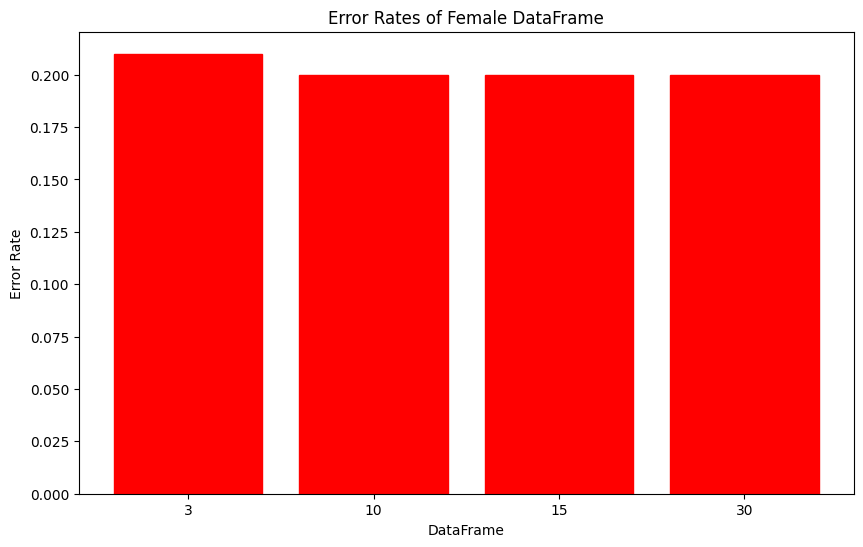

In [32]:
import matplotlib.pyplot as plt

def plot_error_rates_F(female_dfs):
    female_labels = ['3', '10', '15', '30']
    error_rates = []

    # Calculate error rates for female DataFrames
    for df in female_dfs:
        total_examples = len(df['pred'])
        num_errors = sum(1 for pred in df['pred'] if not pred)
        error_rate = num_errors / total_examples
        error_rates.append(error_rate)

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(error_rates)), error_rates, tick_label=female_labels)
    
    # Set colors for female
    for i in range(len(female_labels)):
        bars[i].set_color('red')


    # Add labels and title
    plt.xlabel('DataFrame')
    plt.ylabel('Error Rate')
    plt.title('Error Rates of Female DataFrame')
    
    # Show the plot
    plt.show()

# Plot the error rates03
plot_error_rates_F(female_dfs)

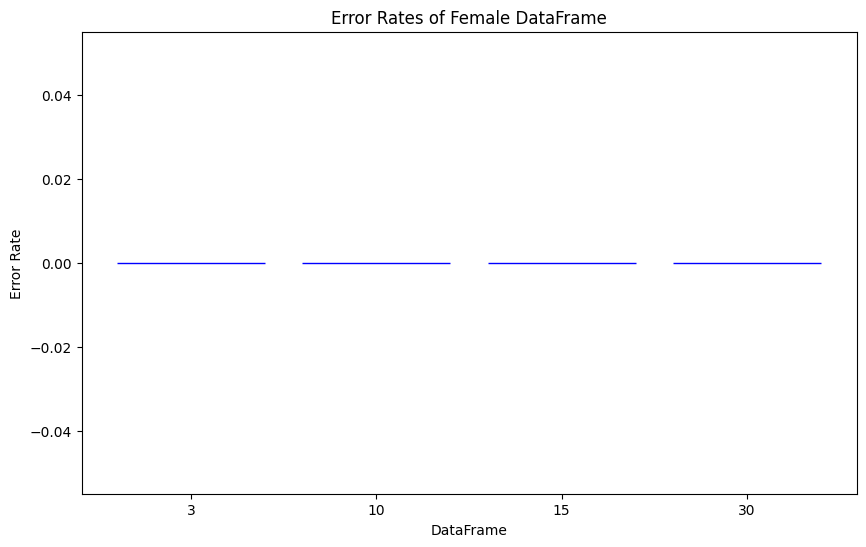

In [42]:
import matplotlib.pyplot as plt

def plot_error_rates_M(male_dfs):
    male_labels = ['3', '10', '15', '30']
    error_rates = []

    # Calculate error rates for female DataFrames
    for df in male_dfs:
        total_examples = len(df['pred'])
        num_errors = sum(1 for pred in df['pred'] if not pred)
        error_rate = num_errors / total_examples
        error_rates.append(error_rate)

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(error_rates)), error_rates, tick_label=male_labels)
    
    # Set colors for female
    for i in range(len(male_labels)):
        bars[i].set_color('blue')


    # Add labels and title
    plt.xlabel('DataFrame')
    plt.ylabel('Error Rate')
    plt.title('Error Rates of Female DataFrame')
    
    # Show the plot
    plt.show()

# Plot the error rates
plot_error_rates_M(male_dfs)

With GMM 256

In [ ]:
female_file_scores_df_3_256=compute_segment_scores(female_file_segments_3, F_models_256)
female_file_scores_df_3_256['pred'] = female_file_scores_df_3_256['True_label'] == female_file_scores_df_3_256['index_model']

female_file_scores_df_10_256=compute_segment_scores(female_file_segments_10, F_models_256)
female_file_scores_df_10_256['pred'] = female_file_scores_df_10_256['True_label'] == female_file_scores_df_10_256['index_model']

female_file_scores_df_15_256=compute_segment_scores(female_file_segments_15, F_models_256)
female_file_scores_df_15_256['pred'] = female_file_scores_df_15_256['True_label'] == female_file_scores_df_15_256['index_model']

female_file_scores_df_30_256=compute_segment_scores(female_file_segments_30, F_models_256)
female_file_scores_df_30_256['pred'] = female_file_scores_df_30_256['True_label'] == female_file_scores_df_30_256['index_model']

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.append(new_row, ignore_index=True)
<ipython-input-24-ba44c7f8c156>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segment_scores = segment_scores.appen

In [ ]:
male_file_scores_df_3_256=compute_segment_scores(male_file_segments_3, H_models_256)
male_file_scores_df_3_256['pred'] = male_file_scores_df_3_256['True_label'] == male_file_scores_df_3_256['index_model']

male_file_scores_df_10_256=compute_segment_scores(male_file_segments_10, H_models_256)
male_file_scores_df_10_256['pred'] = male_file_scores_df_10_256['True_label'] == male_file_scores_df_10_256['index_model']

male_file_scores_df_15_256=compute_segment_scores(male_file_segments_15, H_models_256)
male_file_scores_df_15_256['pred'] = male_file_scores_df_15_256['True_label'] == male_file_scores_df_15_256['index_model']

male_file_scores_df_30_256=compute_segment_scores(male_file_segments_30, H_models_256)
male_file_scores_df_30_256['pred'] = male_file_scores_df_30_256['True_label'] == male_file_scores_df_30_256['index_model']


In [ ]:
# Create lists of female and male DataFrames
female_dfs = [female_file_scores_df_3_256, female_file_scores_df_10_256, female_file_scores_df_15_256, female_file_scores_df_30_256]
male_dfs = [male_file_scores_df_3_256, male_file_scores_df_10_256, male_file_scores_df_15_256, male_file_scores_df_30_256]



In [ ]:
plot_error_rates_F(female_dfs)

In [ ]:
plot_error_rates_M(male_dfs)

With GMM 512



In [ ]:
female_file_scores_df_3_512=compute_segment_scores(female_file_segments_3, F_models_512)
female_file_scores_df_3_512['pred'] = female_file_scores_df_3_512['True_label'] == female_file_scores_df_3_512['index_model']

female_file_scores_df_10_512=compute_segment_scores(female_file_segments_10, F_models_512)
female_file_scores_df_10_512['pred'] = female_file_scores_df_10_512['True_label'] == female_file_scores_df_10_512['index_model']

female_file_scores_df_15_512=compute_segment_scores(female_file_segments_15, F_models_512)
female_file_scores_df_15_512['pred'] = female_file_scores_df_15_512['True_label'] == female_file_scores_df_15_512['index_model']

female_file_scores_df_30_512=compute_segment_scores(female_file_segments_30, F_models_512)
female_file_scores_df_30_512['pred'] = female_file_scores_df_30_512['True_label'] == female_file_scores_df_30_512['index_model']


In [ ]:
male_file_scores_df_3_512=compute_segment_scores(male_file_segments_3, H_models_512)
male_file_scores_df_3_512['pred'] = male_file_scores_df_3_512['True_label'] == male_file_scores_df_3_512['index_model']

male_file_scores_df_10_512=compute_segment_scores(male_file_segments_10, H_models_512)
male_file_scores_df_10_512['pred'] = male_file_scores_df_10_512['True_label'] == male_file_scores_df_10_512['index_model']

male_file_scores_df_15_512=compute_segment_scores(male_file_segments_15, H_models_512)
male_file_scores_df_15_512['pred'] = male_file_scores_df_15_512['True_label'] == male_file_scores_df_15_512['index_model']

male_file_scores_df_30_512=compute_segment_scores(male_file_segments_30, H_models_512)
male_file_scores_df_30_512['pred'] = male_file_scores_df_30_512['True_label'] == male_file_scores_df_30_512['index_model']


In [ ]:
# Create lists of female and male DataFrames
female_dfs = [female_file_scores_df_3_512, female_file_scores_df_10_512, female_file_scores_df_15_512, female_file_scores_df_30_512]
male_dfs = [male_file_scores_df_3_512, male_file_scores_df_10_512, male_file_scores_df_15_512, male_file_scores_df_30_512]



In [ ]:
plot_error_rates_F(female_dfs)

In [ ]:
plot_error_rates_M(male_dfs)

With GMM 1024

In [ ]:
female_file_scores_df_3_1024=compute_segment_scores(female_file_segments_3, F_models_1024)
female_file_scores_df_3_1024['pred'] = female_file_scores_df_3_1024['True_label'] == female_file_scores_df_3_1024['index_model']

female_file_scores_df_10_1024=compute_segment_scores(female_file_segments_10, F_models_1024)
female_file_scores_df_10_1024['pred'] = female_file_scores_df_10_1024['True_label'] == female_file_scores_df_10_1024['index_model']

female_file_scores_df_15_1024=compute_segment_scores(female_file_segments_15, F_models_1024)
female_file_scores_df_15_1024['pred'] = female_file_scores_df_15_1024['True_label'] == female_file_scores_df_15_1024['index_model']

female_file_scores_df_30_1024=compute_segment_scores(female_file_segments_30, F_models_1024)
female_file_scores_df_30_1024['pred'] = female_file_scores_df_30_1024['True_label'] == female_file_scores_df_30_1024['index_model']


In [ ]:
male_file_scores_df_3_1024=compute_segment_scores(male_file_segments_3, H_models_1024)
male_file_scores_df_3_1024['pred'] = male_file_scores_df_3_1024['True_label'] == male_file_scores_df_3_1024['index_model']

male_file_scores_df_10_1024=compute_segment_scores(male_file_segments_10, H_models_1024)
male_file_scores_df_10_1024['pred'] = male_file_scores_df_10_1024['True_label'] == male_file_scores_df_10_1024['index_model']

male_file_scores_df_15_1024=compute_segment_scores(male_file_segments_15, H_models_1024)
male_file_scores_df_15_1024['pred'] = male_file_scores_df_15_1024['True_label'] == male_file_scores_df_15_1024['index_model']

male_file_scores_df_30_1024=compute_segment_scores(male_file_segments_30, H_models_1024)
male_file_scores_df_30_1024['pred'] = male_file_scores_df_30_1024['True_label'] == male_file_scores_df_30_1024['index_model']


In [ ]:
# Create lists of female and male DataFrames
female_dfs = [female_file_scores_df_3_1024, female_file_scores_df_10_1024, female_file_scores_df_15_1024, female_file_scores_df_30_1024]
male_dfs = [male_file_scores_df_3_1024, male_file_scores_df_10_1024, male_file_scores_df_15_1024, male_file_scores_df_30_1024]




In [ ]:
plot_error_rates_F(female_dfs)

In [ ]:
plot_error_rates_M(male_dfs)